In [18]:
words = open("names.txt", "r").read().splitlines()
print(len(words))
# Smallest being 2 characters and 15 being the largest
print(min([len(word) for word in words]))
print(max([len(word) for word in words]))
words[:2]

32033
2
15


['emma', 'olivia']

In [19]:
# Bigram language models are just looking at two characters, the on we are given and predicting the next character in the sequence.
# Bigram model predicts the local characters - bigrams and simple and weak models

bigram_map = {}

# Zip will take two iterators and create an iterator over two tuples of the list - if any of the iterators is larger than the other zip() will handle it by terminating it 
# so we can always use zip to package two characters
for word in words:
    # in a bigram we can define how it starts and ends
    # bigrams can be done by counting how often these words appear after another
    chs = ["<S>"] + list(word) + ["<E>"]
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        # This will allow us to set an entry within a dictionary to increasing values with a default of 0 if our .get() does not find it within the dictionary
        bigram_map[bigram] = bigram_map.get(bigram, 0) + 1

In [20]:
# This will return the tuples of key values and the counts 
# we can sort by the key being the key value indexing the values and thus we get the most probable ones, note here we have the negative value which allows us to do it in descending order
sorted(bigram_map.items(), key=lambda kv: -kv[1])

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [21]:
import torch

In [22]:
a = torch.zeros((3, 5), dtype=torch.int32)
# By default they are torch.float32 adn thus single precision
a.dtype
# Indexing using 1, 3 commas just
a[1, 3] += 1

In [23]:
N = torch.zeros((27, 27), dtype=torch.int32)
characters = sorted(list(set("".join(words)))) # - throw out duplicates of the lowercase characters and it should return the values correctly
# If we simply use a set within a string or something else we will get all unique possible characters that could be within it
stoi = {s:i+1 for i, s in enumerate(characters)}
stoi['.'] = 0
itos = {i:s for s, i in stoi.items()}
# we can get our original mapping function .items() which wil lshow the key value paairs and simply return the inverse of them using value:second_value
# stoi.items()

In [24]:
# bigram_map = {}

# Zip will take two iterators and create an iterator over two tuples of the list - if any of the iterators is larger than the other zip() will handle it by terminating it 
# so we can always use zip to package two characters
for word in words:
    # in a bigram we can define how it starts and ends
    # bigrams can be done by counting how often these words appear after another
    chs = ["."] + list(word) + ["."]
    for ch1, ch2 in zip(chs, chs[1:]):
        prior_index = stoi[ch1]
        post_index = stoi[ch2]

        bigram = (prior_index, post_index)
        N[bigram] += 1
        # # This will allow us to set an entry within a dictionary to increasing values with a default of 0 if our .get() does not find it within the dictionary
        # bigram_map[bigram] = bigram_map.get(bigram, 0) + 1

In [25]:
N

tensor([[   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
         1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
          134,  535,  929],
        [6640,  556,  541,  470, 1042,  692,  134,  168, 2332, 1650,  175,  568,
         2528, 1634, 5438,   63,   82,   60, 3264, 1118,  687,  381,  834,  161,
          182, 2050,  435],
        [ 114,  321,   38,    1,   65,  655,    0,    0,   41,  217,    1,    0,
          103,    0,    4,  105,    0,    0,  842,    8,    2,   45,    0,    0,
            0,   83,    0],
        [  97,  815,    0,   42,    1,  551,    0,    2,  664,  271,    3,  316,
          116,    0,    0,  380,    1,   11,   76,    5,   35,   35,    0,    0,
            3,  104,    4],
        [ 516, 1303,    1,    3,  149, 1283,    5,   25,  118,  674,    9,    3,
           60,   30,   31,  378,    0,    1,  424,   29,    4,   92,   17,   23,
            0,  317,    1],
        [3983,  679,  121,  153,  384, 1271,   82,

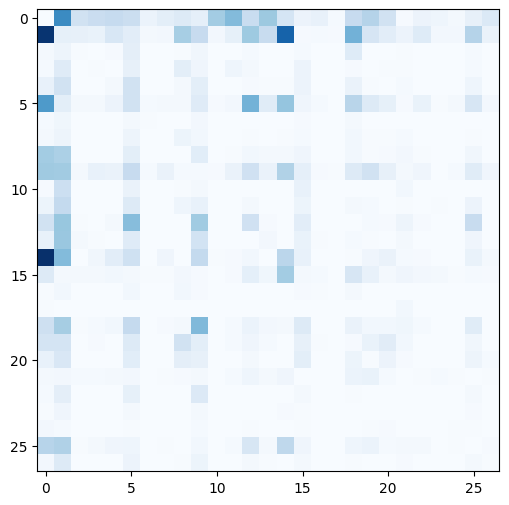

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

# However the problem with plt.imshow(array) is that our bigram mapping is currently set as characters (mapping to indexes within the array)
# What we can do is using an inverse function of character to index we create index to character

# We can use matplotlib to show us an array that is storing our bigram pairs, the highest ones will be the most probable values, e.g we can see that a follows a lot of values
# when we index into torch tensors we have to use N[i, j].item() which will return that individual integer and we can use plt.text() to plot the characters using our mapping itos() and the value
plt.figure(figsize=(6, 6))
# we can change the colourmap in matplotlib
plt.imshow(N, cmap="Blues")

# notice how at the bottom we have <E> character not being followed anything by definition and <S> not followign anytihng either, they take up lots of space and we have lots of brackets that take up space
# Instead of 2 special tokens then we can use one special token

In [27]:
N[0]

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [28]:
# To use floats we need to divi~e and normalise them and thus we need floats for accuracy
p = N[0].float()
p = p / sum(p)
# Now we have normalised them and we can sample from this distribution - we can use a multinomial - multinomial probability distribution
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [29]:
# We can make a deterministic torch generator object, if we apply a seed
g = torch.Generator().manual_seed(2147483647)

# number betwen 0 and 1 that are sampled now we can normalise them and use torch.multinomial which will take the probaiility distribution, replacement means that when we draw an element we can put it back into them
# replacement is by default false within this generator
index = torch.multinomial(p, num_samples = 1, replacement=True, generator=g)
# Then we can get the index that we used to sample from a multinomial
itos[index.item()]

'j'

In [37]:
# Creating an initial bigram model prototype
generator = torch.Generator().manual_seed(2147483647)

# Laplacian smoothing, adding a value of 1 to everything and thus nothing is infinitely unlikely
N = (N + 1).float()

# Take the row that we are on - our bigram will have the next word probabilities already estimated through counting
# Normalising our probability distribution
# P.sum() will give a sum that will output the entire array, every single count, if we look at the documentation we can provide teh input array but also the dimension
# keepdim if we pass it as false, hte dimension is squeezed and collapses dimensions

# summing across axis 0 will sum the 0th dimension and give us the counts [27, 27] wil lturn to [1, 27]

# [27, 27] broadcasting semantics in pytorch will allow you to divide these two [1, 27]
# we must make sure that each tensor has at least one dimension, must either be equal or one of them is one and align them
P = N / N.sum(1, keepdim=True)
# When dividing by these we are stretching out this 1 dimension to match this 27 dimension, this copying / stretching is just simply applied to everything else and elementwise division is applied
for i in range(50):
    output = []
    # We need this to be the index that we start with as our starting character in our case this was the <S> and is now . 
    index = 0
    while True:
        index = torch.multinomial(P[index], num_samples=1, replacement=True, generator=generator).item()
        output.append(itos[index])
        # If we get our end character (index 0) terminate
        if index == 0:
            break

    print("".join(output))


junide.
janasah.
p.
cony.
a.
nn.
kohin.
tolian.
juwe.
ksahnaauranilevias.
dedainrwieta.
ssonielylarte.
faveumerifontume.
phynslenaruani.
core.
yaenon.
ka.
jabdinerimikimaynin.
anaasn.
ssorionsush.
dgossmitan.
il.
le.
pann.
that.
janreli.
isa.
dyn.
rijelumemahaunayaleva.
cararr.
jenh.
anarta.
maly.
abely.
a.
i.
lavadoni.
themielyawat.
f.
modam.
tavilitikiesaloeverin.
n.
e.
kalbrenelah.
anen.
ch.
k.
jan.
odridrdenanialilpergha.
tezralelia.


In [33]:
# We want to get the sum of the values along the rows if we sum along dimension 0 we will get
# This dimension is unintuitive but it is done because pytorch collapses the dimension you choose, since axis 0 is the row we are collapsing the entire thing to axis 0 to be a row and thus summing all columns
# since we want to collapse all rows to be one column which adds up the entire row we want it to collapse column wise and thus need dimension one
# without keep dimension it will all collapse into one so we want to make sure we keep dimension so that we can broadcast it across the entire array for normalisation
# N / N.sum(1, keepdim=True)

In [34]:
# Broadcasting efficiency
# Creates a new tensor that is stored into N
# N = N / N.sum(1, keepdim=True)

# This will do it in place and is actually preferred
# N /= N.sum(1, keepdim=True)

In [35]:
# We also want to evaluate the quality of this model currently using a single metric
# The probability that the model assigns to every single bigram

# Maximum likelihood estimation - we can use the likelihood - the product of all the probabilities, the probability of the entire dataset given the model so the probability should be as high as possible
# Since the product will tend to 0 we can use the log likelihood
# Log likelihood will return a negative nmber so we use negative log likelihod we can also just sum them up
# Negative log likelihood is a very nice loss function 
# we can also use an average of hte log likelihood per character / word


In [ ]:
# We can use some laplacian smoothing on our model because if we have 0 then we will get a MLE of infinity